# Multi Index Object


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
death = pd.read_csv("data/time_series_covid19_deaths_global.csv")
confirm = pd.read_csv("data/time_series_covid19_confirmed_global.csv")
exps = pd.read_csv("data/expense_data.csv")

## Multi Index Series (Hierarchial Indexing)


In [ ]:
index_val = [
    ("cse", 20),
    ("cse", 2020),
    ("cse", 2021),
    ("cse", 2022),
    ("ece", 2019),
    ("ece", 2020),
    ("ece", 2021),
    ("ece", 2022),
]
multi_index = pd.MultiIndex.from_tuples(index_val)
multi_index

MultiIndex([('cse',   20),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [4]:
pd.MultiIndex.from_product([["cse", "ece"], [2019, 2020, 2021, 2022]])

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

### Creating Series with Multi Index


In [5]:
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8], index=multi_index)

In [6]:
s["cse"]

20      1
2020    2
2021    3
2022    4
dtype: int64

### Multi Index Series to DataFrame & vice versa


In [ ]:
temp = s.unstack()
temp

,20,2019,2020,2021,2022
cse,1.0,NaN,2.0,3.0,4.0
ece,NaN,5.0,6.0,7.0,8.0


In [8]:
temp.stack()

cse  20      1.0
     2020    2.0
     2021    3.0
     2022    4.0
ece  2019    5.0
     2020    6.0
     2021    7.0
     2022    8.0
dtype: float64

## Multi Index DataFrame


### Row Hierarchial


In [ ]:
branch_df1 = pd.DataFrame(
    np.arange(1, 17).reshape(-1, 2),
    index=multi_index,
    columns=["avg_package", "students"],
)
branch_df1

avg_package  students
cse 20              1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [10]:
branch_df1.loc["cse"]

,avg_package,students
20,1,2
2020,3,4
2021,5,6
2022,7,8


### Column Hierarchial


In [ ]:
branch_df2 = pd.DataFrame(
    np.hstack((np.arange(1, 9).reshape(4, 2), np.zeros((4, 2)))),
    index=[2019, 2020, 2021, 2022],
    columns=pd.MultiIndex.from_product(
        [["delhi", "mumbai"], ["avg_package", "student"]]
    ),
)
branch_df2

delhi              mumbai        
     avg_package student avg_package student
2019         1.0     2.0         0.0     0.0
2020         3.0     4.0         0.0     0.0
2021         5.0     6.0         0.0     0.0
2022         7.0     8.0         0.0     0.0

In [12]:
branch_df2["mumbai", "avg_package"]

2019    0.0
2020    0.0
2021    0.0
2022    0.0
Name: (mumbai, avg_package), dtype: float64

In [13]:
branch_df2.loc[2020]

delhi   avg_package    3.0
        student        4.0
mumbai  avg_package    0.0
        student        0.0
Name: 2020, dtype: float64

### Both Row and Column


In [ ]:
branch_df3 = pd.DataFrame(
    np.hstack((np.arange(1, 17).reshape(8, 2), np.zeros((8, 2)))),
    index=multi_index,
    columns=pd.MultiIndex.from_product(
        [["delhi", "mumbai"], ["avg_package", "student"]]
    ),
)
branch_df3

delhi              mumbai        
         avg_package student avg_package student
cse 20           1.0     2.0         0.0     0.0
    2020         3.0     4.0         0.0     0.0
    2021         5.0     6.0         0.0     0.0
    2022         7.0     8.0         0.0     0.0
ece 2019         9.0    10.0         0.0     0.0
    2020        11.0    12.0         0.0     0.0
    2021        13.0    14.0         0.0     0.0
    2022        15.0    16.0         0.0     0.0

In [15]:
branch_df3[("delhi", "avg_package")].loc[("cse", 2020)]

np.float64(3.0)

## Stacking and Unstacking


In [16]:
branch_df1

avg_package  students
cse 20              1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [17]:
branch_df1.unstack().unstack()

avg_package  20    cse     1.0
                   ece     NaN
             2019  cse     NaN
                   ece     9.0
             2020  cse     3.0
                   ece    11.0
             2021  cse     5.0
                   ece    13.0
             2022  cse     7.0
                   ece    15.0
students     20    cse     2.0
                   ece     NaN
             2019  cse     NaN
                   ece    10.0
             2020  cse     4.0
                   ece    12.0
             2021  cse     6.0
                   ece    14.0
             2022  cse     8.0
                   ece    16.0
dtype: float64

In [18]:
branch_df2

delhi              mumbai        
     avg_package student avg_package student
2019         1.0     2.0         0.0     0.0
2020         3.0     4.0         0.0     0.0
2021         5.0     6.0         0.0     0.0
2022         7.0     8.0         0.0     0.0

In [19]:
branch_df2.stack().stack()

C:\Users\techn\AppData\Local\Temp\ipykernel_6060\3351297655.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df2.stack().stack()


2019  avg_package  delhi     1.0
                   mumbai    0.0
      student      delhi     2.0
                   mumbai    0.0
2020  avg_package  delhi     3.0
                   mumbai    0.0
      student      delhi     4.0
                   mumbai    0.0
2021  avg_package  delhi     5.0
                   mumbai    0.0
      student      delhi     6.0
                   mumbai    0.0
2022  avg_package  delhi     7.0
                   mumbai    0.0
      student      delhi     8.0
                   mumbai    0.0
dtype: float64

In [20]:
branch_df3

delhi              mumbai        
         avg_package student avg_package student
cse 20           1.0     2.0         0.0     0.0
    2020         3.0     4.0         0.0     0.0
    2021         5.0     6.0         0.0     0.0
    2022         7.0     8.0         0.0     0.0
ece 2019         9.0    10.0         0.0     0.0
    2020        11.0    12.0         0.0     0.0
    2021        13.0    14.0         0.0     0.0
    2022        15.0    16.0         0.0     0.0

In [21]:
branch_df3.stack().stack()

C:\Users\techn\AppData\Local\Temp\ipykernel_6060\4037618427.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df3.stack().stack()


cse  20    avg_package  delhi      1.0
                        mumbai     0.0
           student      delhi      2.0
                        mumbai     0.0
     2020  avg_package  delhi      3.0
                        mumbai     0.0
           student      delhi      4.0
                        mumbai     0.0
     2021  avg_package  delhi      5.0
                        mumbai     0.0
           student      delhi      6.0
                        mumbai     0.0
     2022  avg_package  delhi      7.0
                        mumbai     0.0
           student      delhi      8.0
                        mumbai     0.0
ece  2019  avg_package  delhi      9.0
                        mumbai     0.0
           student      delhi     10.0
                        mumbai     0.0
     2020  avg_package  delhi     11.0
                        mumbai     0.0
           student      delhi     12.0
                        mumbai     0.0
     2021  avg_package  delhi     13.0
                        m

## Extracting Rows


In [22]:
branch_df3.loc[("cse", 2020)]

delhi   avg_package    3.0
        student        4.0
mumbai  avg_package    0.0
        student        0.0
Name: (cse, 2020), dtype: float64

In [23]:
branch_df3.loc[("cse", 2019) : ("ece", 2020) : 2]

delhi              mumbai        
         avg_package student avg_package student
cse 2020         3.0     4.0         0.0     0.0
    2022         7.0     8.0         0.0     0.0
ece 2020        11.0    12.0         0.0     0.0

In [24]:
branch_df3.iloc[0:5:2]

delhi              mumbai        
         avg_package student avg_package student
cse 20           1.0     2.0         0.0     0.0
    2021         5.0     6.0         0.0     0.0
ece 2019         9.0    10.0         0.0     0.0

## Extracting Columns


In [25]:
branch_df3[[("delhi", "avg_package"), ("mumbai", "student")]]

delhi  mumbai
         avg_package student
cse 20           1.0     0.0
    2020         3.0     0.0
    2021         5.0     0.0
    2022         7.0     0.0
ece 2019         9.0     0.0
    2020        11.0     0.0
    2021        13.0     0.0
    2022        15.0     0.0

## Sorting


In [26]:
branch_df3.sort_index(level=0, ascending=False)

delhi              mumbai        
         avg_package student avg_package student
ece 2022        15.0    16.0         0.0     0.0
    2021        13.0    14.0         0.0     0.0
    2020        11.0    12.0         0.0     0.0
    2019         9.0    10.0         0.0     0.0
cse 2022         7.0     8.0         0.0     0.0
    2021         5.0     6.0         0.0     0.0
    2020         3.0     4.0         0.0     0.0
    20           1.0     2.0         0.0     0.0

## Transpose


In [27]:
branch_df3.transpose()

cse                  ece                  
                   20   2020 2021 2022  2019  2020  2021  2022
delhi  avg_package  1.0  3.0  5.0  7.0   9.0  11.0  13.0  15.0
       student      2.0  4.0  6.0  8.0  10.0  12.0  14.0  16.0
mumbai avg_package  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0
       student      0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0

## Swap Level


In [28]:
branch_df3.swaplevel()

delhi              mumbai        
         avg_package student avg_package student
20   cse         1.0     2.0         0.0     0.0
2020 cse         3.0     4.0         0.0     0.0
2021 cse         5.0     6.0         0.0     0.0
2022 cse         7.0     8.0         0.0     0.0
2019 ece         9.0    10.0         0.0     0.0
2020 ece        11.0    12.0         0.0     0.0
2021 ece        13.0    14.0         0.0     0.0
2022 ece        15.0    16.0         0.0     0.0

In [29]:
branch_df3.swaplevel(axis=1)

avg_package student avg_package student
               delhi   delhi      mumbai  mumbai
cse 20           1.0     2.0         0.0     0.0
    2020         3.0     4.0         0.0     0.0
    2021         5.0     6.0         0.0     0.0
    2022         7.0     8.0         0.0     0.0
ece 2019         9.0    10.0         0.0     0.0
    2020        11.0    12.0         0.0     0.0
    2021        13.0    14.0         0.0     0.0
    2022        15.0    16.0         0.0     0.0

## Melt


In [30]:
pd.DataFrame({"cse": [120]}).melt()

,variable,value
0,cse,120


In [ ]:
pd.DataFrame(
    {
        "cse": [120],
        "ece": [100],
        "mech": [50],
    }
).melt(var_name="branch", value_name="student_count")

,branch,student_count
0,cse,120
1,ece,100
2,mech,50


In [ ]:
pd.DataFrame(
    {
        "branch": ["cse", "ece", "mech"],
        "2020": [100, 150, 60],
        "2021": [120, 130, 80],
        "2022": [150, 140, 70],
    }
).melt(id_vars=["branch"], var_name="year", value_name="student_count")

,branch,year,student_count
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,80
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [ ]:
death = death.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="date",
    value_name="death_count",
)
confirm = confirm.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="date",
    value_name="confirm_count",
)

In [34]:
death.head()

,Province/State,Country/Region,Lat,Long,date,death_count
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [35]:
confirm.head()

,Province/State,Country/Region,Lat,Long,date,confirm_count
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [ ]:
confirm.merge(
    death, on=["Province/State", "Country/Region", "Lat", "Long", "date"]
)[["Country/Region", "date", "confirm_count", "death_count"]]

,Country/Region,date,confirm_count,death_count
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024


## Pivot Table


In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
tips.groupby(["sex", "smoker"])[["total_bill"]].mean().unstack()

C:\Users\techn\AppData\Local\Temp\ipykernel_6060\4189768784.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(["sex", "smoker"])[["total_bill"]].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [ ]:
tips.pivot_table(
    index="sex",
    columns="smoker",
    values="total_bill",
)

C:\Users\techn\AppData\Local\Temp\ipykernel_6060\436710407.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [ ]:
tips.pivot_table(
    index="sex",
    columns="smoker",
    values="total_bill",
    aggfunc="sum",
)

C:\Users\techn\AppData\Local\Temp\ipykernel_6060\3625673941.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(


smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [ ]:
tips.pivot_table(
    index=["sex", "smoker"],
    columns=["day", "time"],
    values=["total_bill", "size", "tip"],
    aggfunc={"size": "mean", "tip": "max", "total_bill": "sum"},
)

C:\Users\techn\AppData\Local\Temp\ipykernel_6060\2928127428.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(


size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

### Margins


In [ ]:
tips.pivot_table(
    index="sex",
    columns="smoker",
    values="total_bill",
    aggfunc="sum",
    margins=True,
)

C:\Users\techn\AppData\Local\Temp\ipykernel_6060\4123786603.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(


smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [43]:
exps.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [44]:
exps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [ ]:
exps["Date"] = pd.to_datetime(exps["Date"])
exps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [ ]:
exps["Month"] = exps["Date"].dt.month_name()
exps.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,Month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


### Graphs


<Axes: xlabel='Month'>

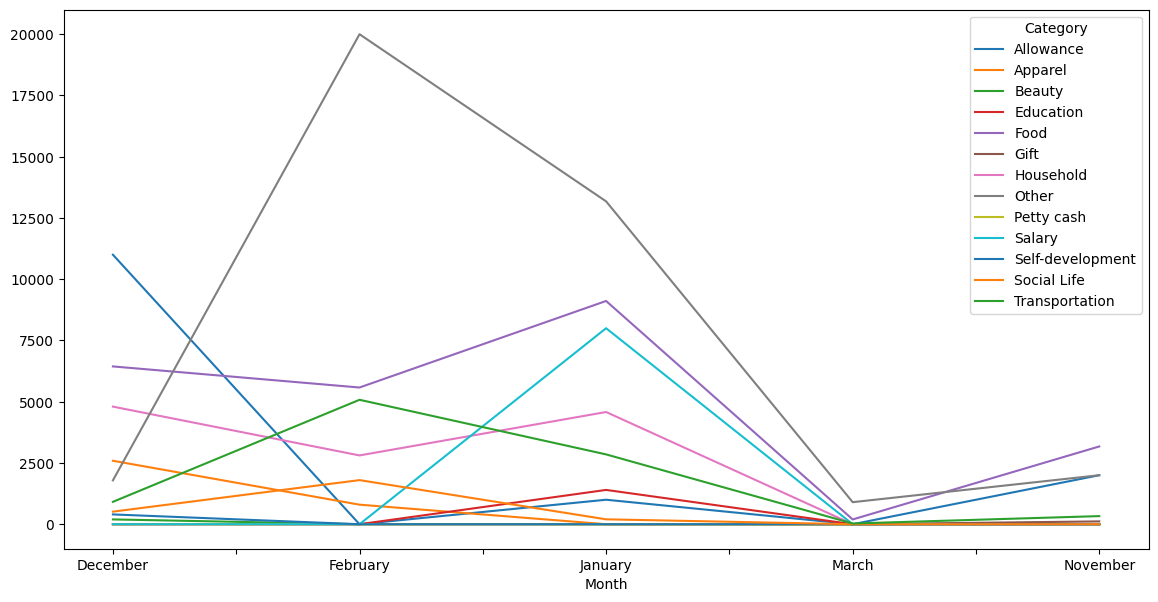

In [ ]:
exps.pivot_table(
    index="Month",
    columns="Category",
    values="INR",
    aggfunc="sum",
    fill_value=0,
).plot(figsize=(14, 7))

<Axes: xlabel='Month'>

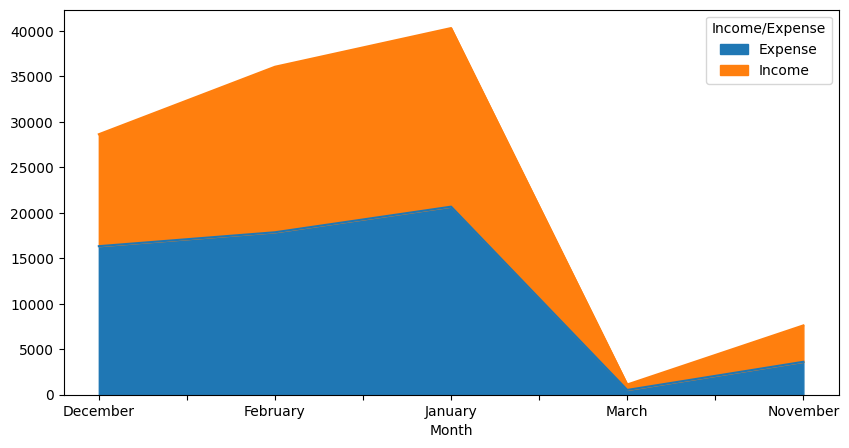

In [ ]:
exps.pivot_table(
    index="Month",
    columns="Income/Expense",
    values="INR",
    aggfunc="sum",
    fill_value=0,
).plot(figsize=(10, 5), kind="area")